In [1]:
import os, sys
sys.path.insert(0, os.path.join(".."))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import impute.geometry
import impute.dallas
import impute.voroni
import matplotlib.patches
import matplotlib.collections
import numpy as np
import tilemapbase
#import shapely.geometry
import pyproj
proj = pyproj.Proj({"init":"EPSG:2845"})

In [3]:
#datadir = os.path.join("..", "..", "..", "Data")
datadir = os.path.join("/media", "disk", "Data")
filename = os.path.join(datadir, "Dallas_11_Sept_2017.csv")
data = list(impute.dallas.load_full(filename))

# Use `xy` data

A few entries only have lon/lat data, so project and replace the empty `xy` data

In [4]:
new_data = []
for row in data:
    if row.xy is None:
        if row.lonlat is None:
            continue
        t = list(row)
        t[-1] = proj(*row.lonlat)
        row = impute.dallas.Row(*t)
    new_data.append(row)
data = new_data

# Form voroni diagram

In [5]:
points = np.asarray([row.xy for row in new_data])
points.shape

(178499, 2)

In [6]:
voroni = impute.voroni.Voroni(points, tolerance=10)

In [7]:
polys = list(voroni.all_polygons())
len(polys)

66522

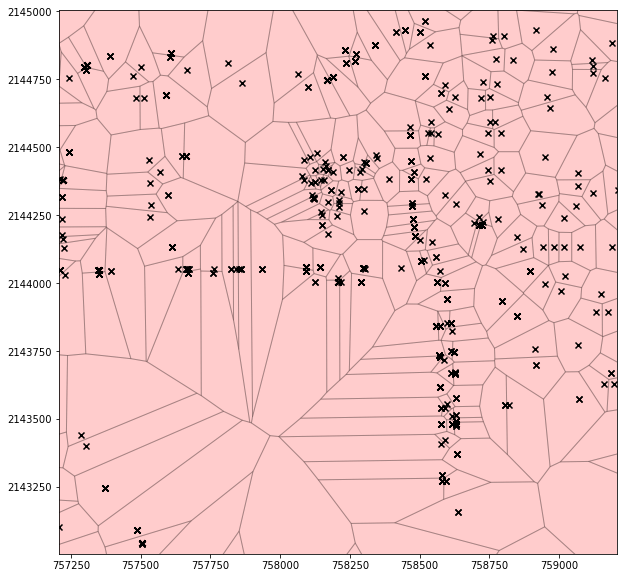

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

c = matplotlib.collections.PatchCollection(
    [matplotlib.patches.Polygon(p, ec="black", fc="red", alpha=0.2) for p in polys],
    match_original=True)
ax.add_collection(c)

ax.scatter(*points.T, marker="x", color="black")
si = 1000
x, y = points[0]
ax.set(xlim=[x-si,x+si], ylim=[y-si,y+si])
None

In [9]:
import open_cp.geometry
import matplotlib.patches
import tilemapbase

def project_to_wm(xcs, ycs):
    xcs, ycs = proj(xcs, ycs, inverse=True)
    points = [tilemapbase.project(x, y) for x, y in zip(xcs, ycs)]
    return np.asarray(points)

pts_wm = project_to_wm(*points.T)

In [10]:
polys_wm = [project_to_wm(*np.asarray(poly).T) for poly in polys]

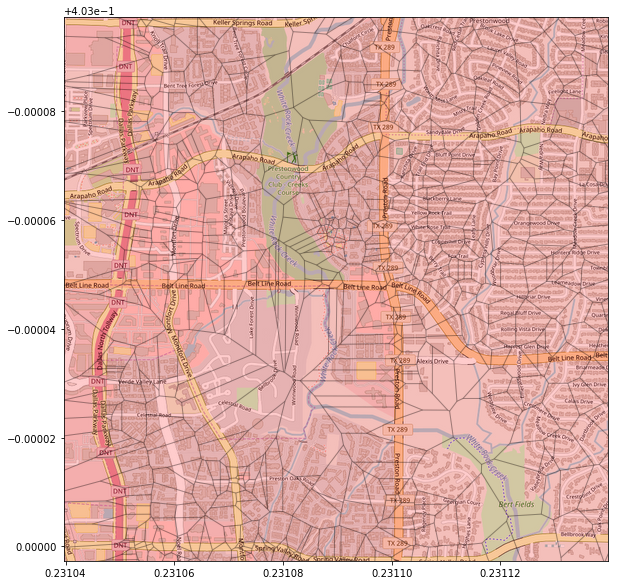

In [11]:
ex = tilemapbase.Extent.from_centre(*pts_wm[0], xsize=0.0001)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

c = matplotlib.collections.PatchCollection(
    [matplotlib.patches.Polygon(p, ec="black", fc="red", alpha=0.2) for p in polys_wm],
    match_original=True)
ax.add_collection(c)

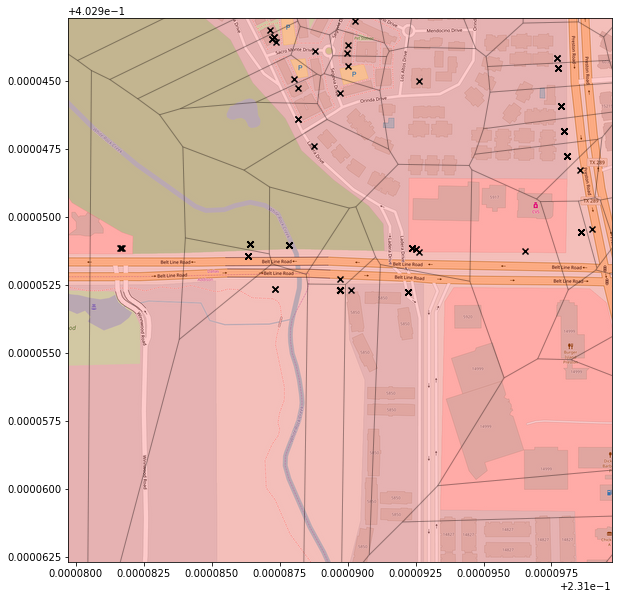

In [12]:
ex = tilemapbase.Extent.from_centre(*pts_wm[0], xsize=0.00002)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

c = matplotlib.collections.PatchCollection(
    [matplotlib.patches.Polygon(p, ec="black", fc="red", alpha=0.2) for p in polys_wm],
    match_original=True)
ax.add_collection(c)
ax.scatter(*pts_wm.T, marker="x", color="black")
None

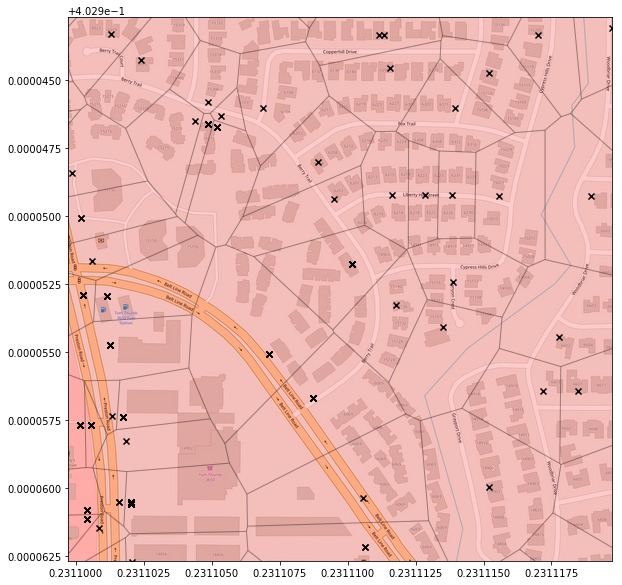

In [16]:
ex = tilemapbase.Extent.from_centre(*pts_wm[0], xsize=0.00002)
ex = ex.with_translation(1, 0)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)

fig, ax = plt.subplots(figsize=(10,10))
plotter.plot(ax)

c = matplotlib.collections.PatchCollection(
    [matplotlib.patches.Polygon(p, ec="black", fc="red", alpha=0.2) for p in polys_wm],
    match_original=True)
ax.add_collection(c)
ax.scatter(*pts_wm.T, marker="x", color="black")
None

## Conclusion

This doesn't work well-- we have essentially just drawn a Voroni cell around each event, which is not what we're trying to do...